### This notebook plots niceley the electron-jet momemntum balance, 
### as well as the e-jet ∆phi distribution. Two observables of interest at the EIC

In [1]:
import ROOT
import numpy as np
#import root_numpy as rnp
from ROOT import TGraphErrors
from ROOT import TVectorT
import matplotlib.pyplot as plt
from matplotlib import ticker

Welcome to JupyROOT 6.22/06


## File and N_Missing Cut

In [2]:
No_Missing_Const = True
latex_dir="/Users/fernando/Documents/Latex_AllSi/"
filename = "~/Downloads/Histograms_Jet_Callibration.root"
file = ROOT.TFile(filename)

In [20]:
def TH1_to_numpy_wErrors(file, TH1_name,normalize=False,log_scale=False):    
    th1 = file.Get(TH1_name)
    Nx = th1.GetNbinsX()
    th1_array = np.zeros(Nx)
    th1_errors = np.zeros(Nx)
        
    for i in range(Nx):
        val = th1.GetBinContent(i+1)
        error = th1.GetBinError(i+1)
        if log_scale and val == 0:
            val = np.nan
        if not(log_scale) and val!=0 and error/val >= 0.5: 
            val=np.nan #skip converged fits with poor statistics
        th1_array[i] = val
        th1_errors[i] = error
    if normalize:
        N = th1.GetEntries()
        th1_array = th1_array/N
        th1_errors = th1_errors/N
    return th1_array, th1_errors

In [21]:
def get_th1_binning_np(file, TH1_name):
    th1 = file.Get(TH1_name)
    N = th1.GetNbinsX()
    min = th1.GetXaxis().GetXmin()
    max = th1.GetXaxis().GetXmax()
    bins = np.linspace(min,max,N+1)
    centers = (bins[1:] + bins[:-1]) /2
    widths = [(j-i)/2 for i, j in zip(bins[:-1], bins[1:])]
    if (len(centers)!=N):
        print("something went wrong")
        exit()
    return bins,centers,widths

## dP/P Comparison

In [22]:
dpp_bins,dpp_centers,dpp_widths = get_th1_binning_np(file,"dP_P")
dpp,dpp_errors = TH1_to_numpy_wErrors(file,"dP_P",False,True)
dpp_anticut,dpp_anticut_errors = TH1_to_numpy_wErrors(file,"PRecoJet_over_PTrueJet_anticut",False,True)

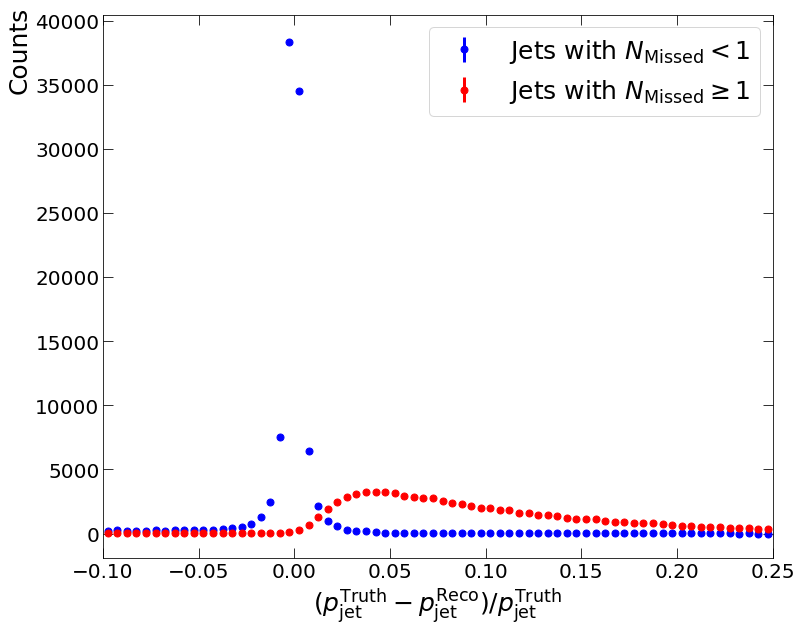

In [23]:
fig = plt.figure(figsize=(12,10))
plt.tight_layout()
plt.xlim(-0.1,0.25)
plt.errorbar(dpp_centers,dpp,yerr=dpp_errors,
            fmt='o',color='blue',markersize=7,linewidth=3,
            label=r"Jets with $N_\mathrm{Missed} < 1$")

plt.errorbar(dpp_centers,dpp_anticut,yerr=dpp_anticut_errors,
            fmt='o',color='red',markersize=7,linewidth=3,
            label=r"Jets with $N_\mathrm{Missed} \geq 1$")

plt.legend(fontsize=25,loc='upper right')
plt.ylabel("Counts",fontsize=25,y=0.935)
plt.xlabel(r"$(p_\mathrm{jet}^\mathrm{Truth} - p_\mathrm{jet}^\mathrm{Reco})/p_\mathrm{jet}^\mathrm{Truth}$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.savefig(latex_dir+"dPP_two_jets.pdf")

### Electron Jet $\Delta\varphi$

In [24]:
dPhi_bins,dPhi_centers,dPhi_widths = get_th1_binning_np(file,"dPhi_e_TrueJet")

In [25]:
TJ_dPhi, TJ_dPhi_errors = TH1_to_numpy_wErrors(file,"dPhi_e_TrueJet",True)

In [26]:
RJ_dPhi, RJ_dPhi_errors = TH1_to_numpy_wErrors(file,"dPhi_e_RecoJet",True)

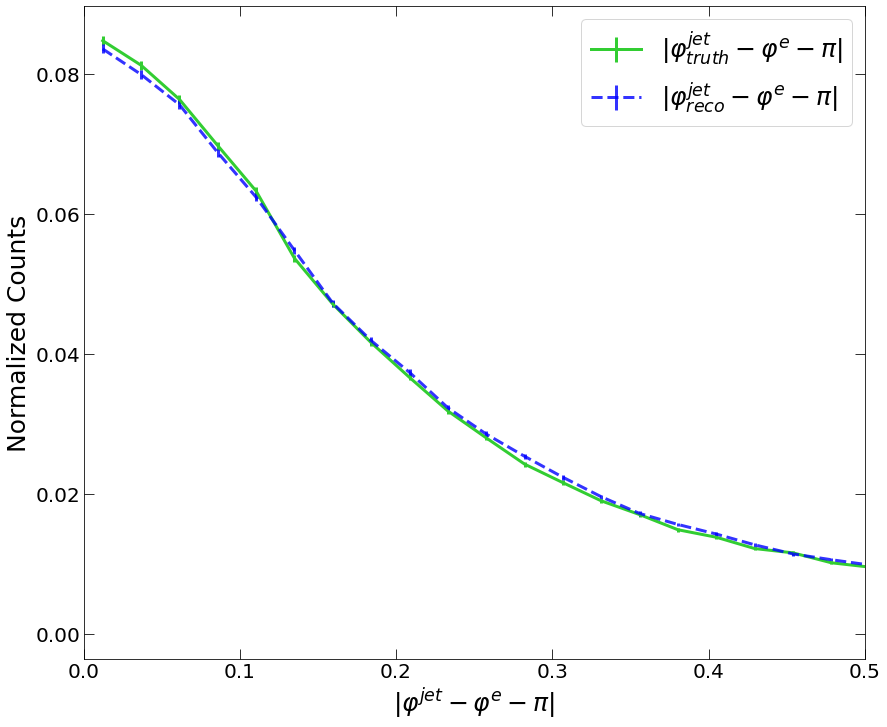

In [27]:
fig = plt.figure(figsize=(14,12))
plt.tight_layout()
plt.xlim(0,.5)
plt.errorbar(dPhi_centers,TJ_dPhi,yerr=TJ_dPhi_errors,
                         fmt='-',color='limegreen',fillstyle='none',markersize=7,linewidth=3,
                         label=r"$|\varphi_{truth}^{jet} - \varphi^{e}-\pi|$")

plt.errorbar(dPhi_centers,RJ_dPhi,yerr=RJ_dPhi_errors,
                         fmt='--',color='blue',linewidth=3,alpha=0.8,
                         label=r"$|\varphi_{reco}^{jet} - \varphi^{e}-\pi|$")

plt.ylabel("Normalized Counts",fontsize=25,y=0.5)
plt.xlabel(r"$|\varphi^{jet} - \varphi^{e}-\pi|$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
plt.savefig(latex_dir+"azimuthal_correlations.pdf")

## Electron Jet Momentum Balance

In [28]:
mom_bins, mom_centers, mom_widths = get_th1_binning_np(file,"ETrueJet_over_Eelectron")

In [29]:
TJ_e_mom, TJ_e_mom_errors = TH1_to_numpy_wErrors(file,"ETrueJet_over_Eelectron",True)
RJ_e_mom, RJ_e_mom_errors = TH1_to_numpy_wErrors(file,"Eelectron_over_ERecoJet_over_Eelectron",True)

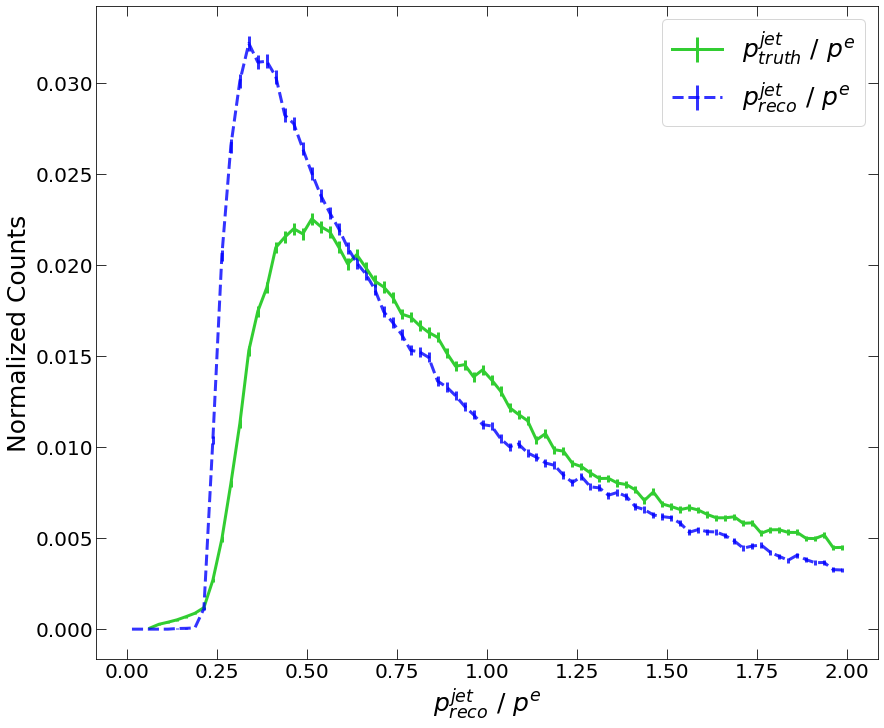

In [33]:
fig = plt.figure(figsize=(14,12))
plt.tight_layout()
#plt.xlim(0,.5)
plt.errorbar(mom_centers,TJ_e_mom,yerr=TJ_e_mom_errors,
                         fmt='-',color='limegreen',fillstyle='none',markersize=7,linewidth=3,
                         label=r"$p_{truth}^{jet}~/~p^{e}$")

plt.errorbar(mom_centers,RJ_e_mom,yerr=RJ_e_mom_errors,
                         fmt='--',color='blue',linewidth=3,alpha=0.8,
                         label=r"$p_{reco}^{jet}~/~p^{e}$")

plt.ylabel("Normalized Counts",fontsize=25,y=0.5)
plt.xlabel(r"$p_{reco}^{jet}~/~p^{e}$",fontsize=25,x=0.5)
plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
plt.legend(fontsize=25,loc='upper right')
#plt.savefig(latex_dir+"momentum_balance.pdf")